#Load and Clean the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File path
file_path = r"C:\Users\rahul\Rahulpython\basic_spotify_data.csv"

# Read the data
df = pd.read_csv(file_path)

# Convert timestamp
df['ts'] = pd.to_datetime(df['ts'])

# Convert ms_played to seconds
df['seconds_played'] = df['ms_played'] / 1000

# Drop rows with missing track names (not songs or played too little)
df = df.dropna(subset=['master_metadata_track_name'])

# Basic preview
print("Columns in dataset:\n", df.columns)
print("\nFirst few rows:\n", df[['ts', 'master_metadata_track_name', 'master_metadata_album_artist_name', 'seconds_played']].head())


Columns in dataset:
 Index(['ts', 'platform', 'ms_played', 'conn_country', 'ip_addr',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'audiobook_title',
       'audiobook_uri', 'audiobook_chapter_uri', 'audiobook_chapter_title',
       'reason_start', 'reason_end', 'shuffle', 'skipped', 'offline',
       'offline_timestamp', 'incognito_mode', 'hour', 'weekday', 'month',
       'year', 'daypart', 'track_id', 'seconds_played'],
      dtype='object')

First few rows:
                          ts master_metadata_track_name  \
0 2020-01-19 18:18:10+00:00                       Numb   
1 2020-01-19 18:18:10+00:00                All At Once   
2 2020-01-19 18:18:10+00:00                       Numb   
3 2020-01-19 18:23:14+00:00                All At Once   
4 2020-01-19 18:23:16+00:00                       Numb   

  master_metadata_album_

In [ ]:
#My Listening Habits by Time

In [3]:
#1Top albums per artist

#2Monthly listening heatmaps

#3Unique songs per day

#4Active days of the week

#5Compare two favorite artists

#6Word cloud of song titles or artists
import pandas as pd

df = pd.read_csv("basic_spotify_data.csv")
print(df.columns)


Index(['ts', 'platform', 'ms_played', 'conn_country', 'ip_addr',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'audiobook_title',
       'audiobook_uri', 'audiobook_chapter_uri', 'audiobook_chapter_title',
       'reason_start', 'reason_end', 'shuffle', 'skipped', 'offline',
       'offline_timestamp', 'incognito_mode', 'hour', 'weekday', 'month',
       'year', 'daypart', 'track_id'],
      dtype='object')


In [ ]:
# --- Data Visualization and Analysis ---

Time Interval of Records: 2020-01-19 23:48:10+05:30 to 2025-05-20 01:03:42+05:30


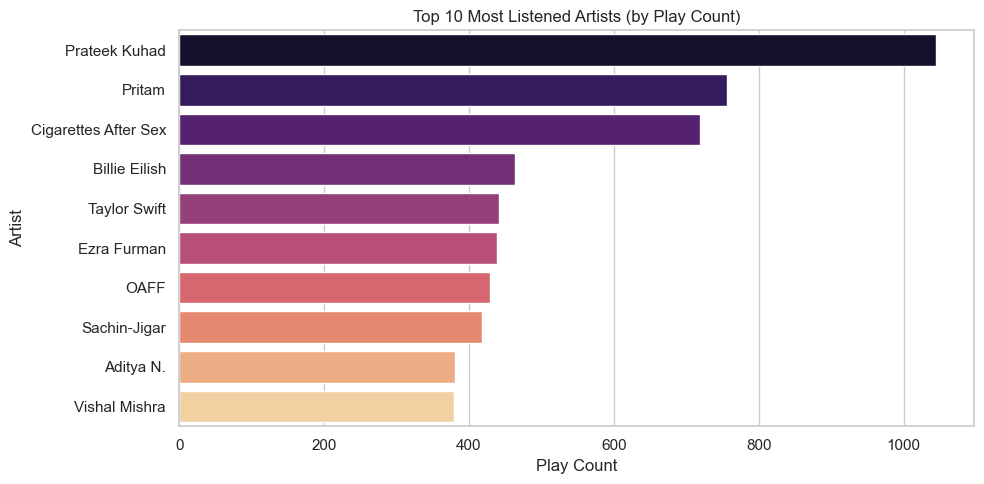

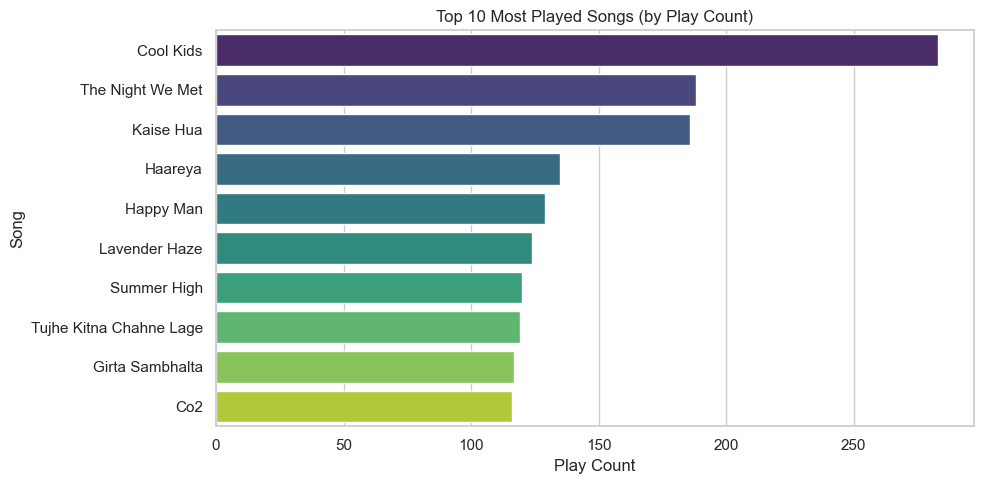

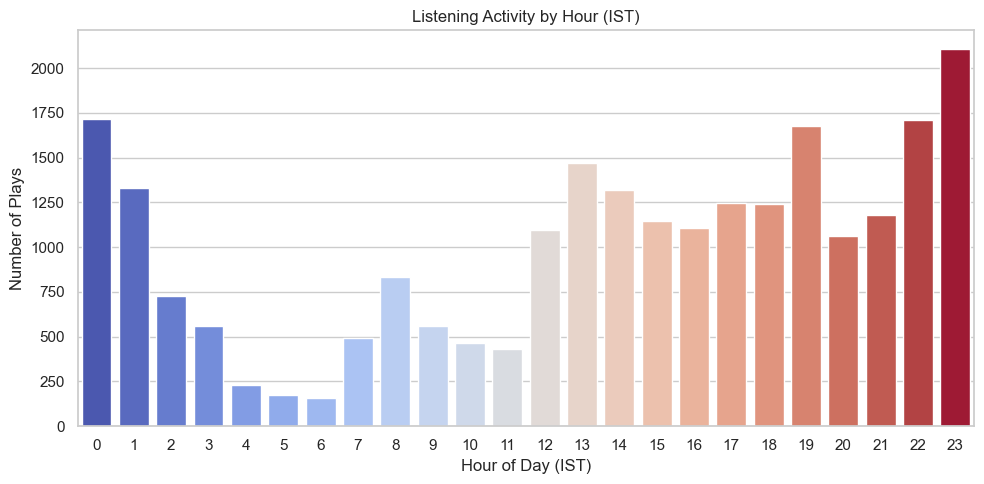

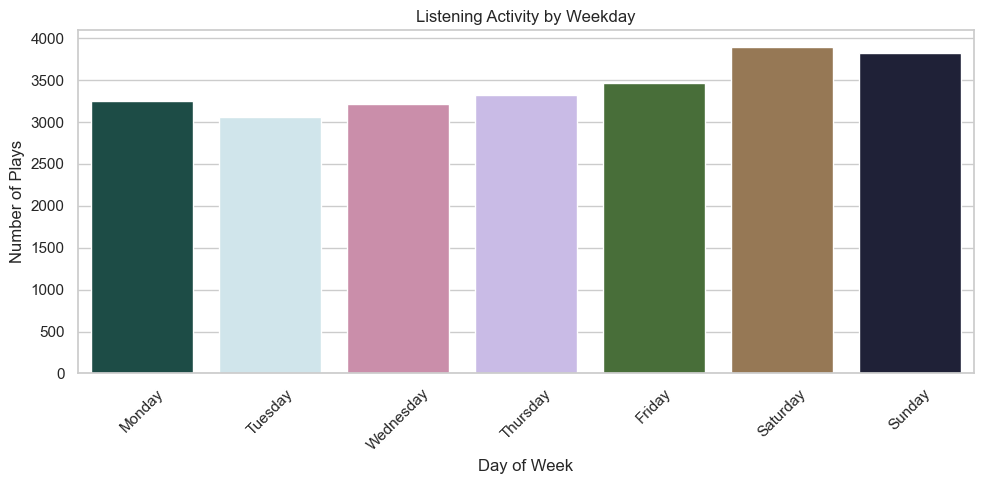

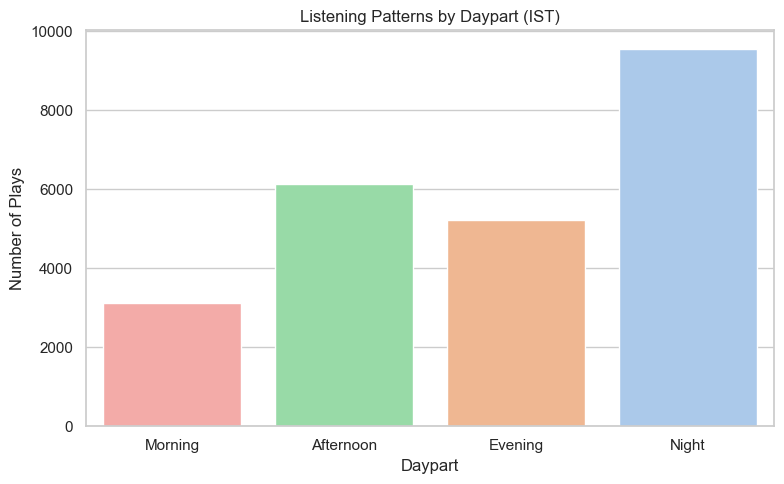

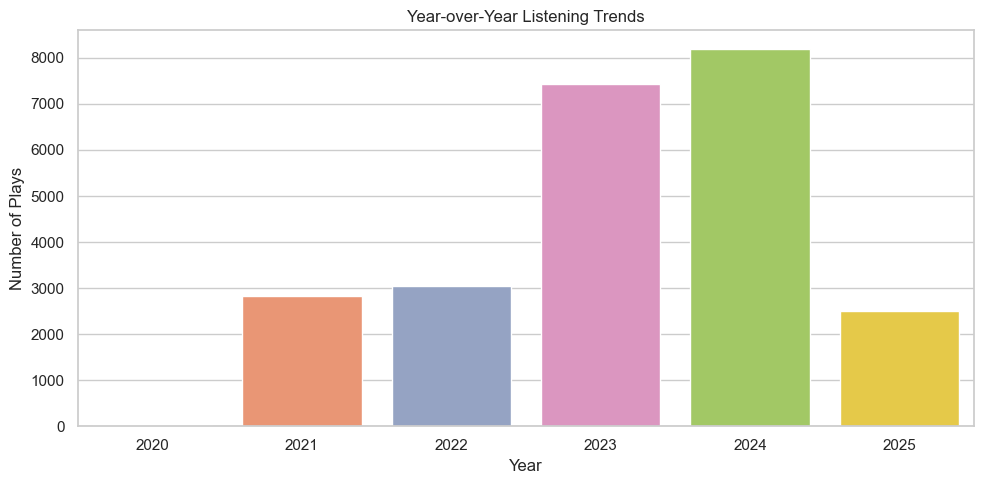

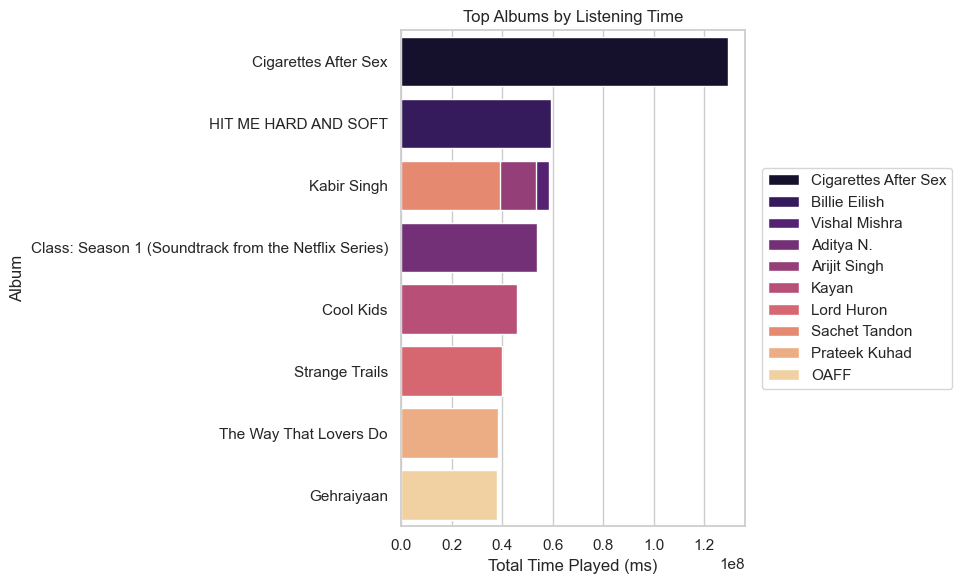

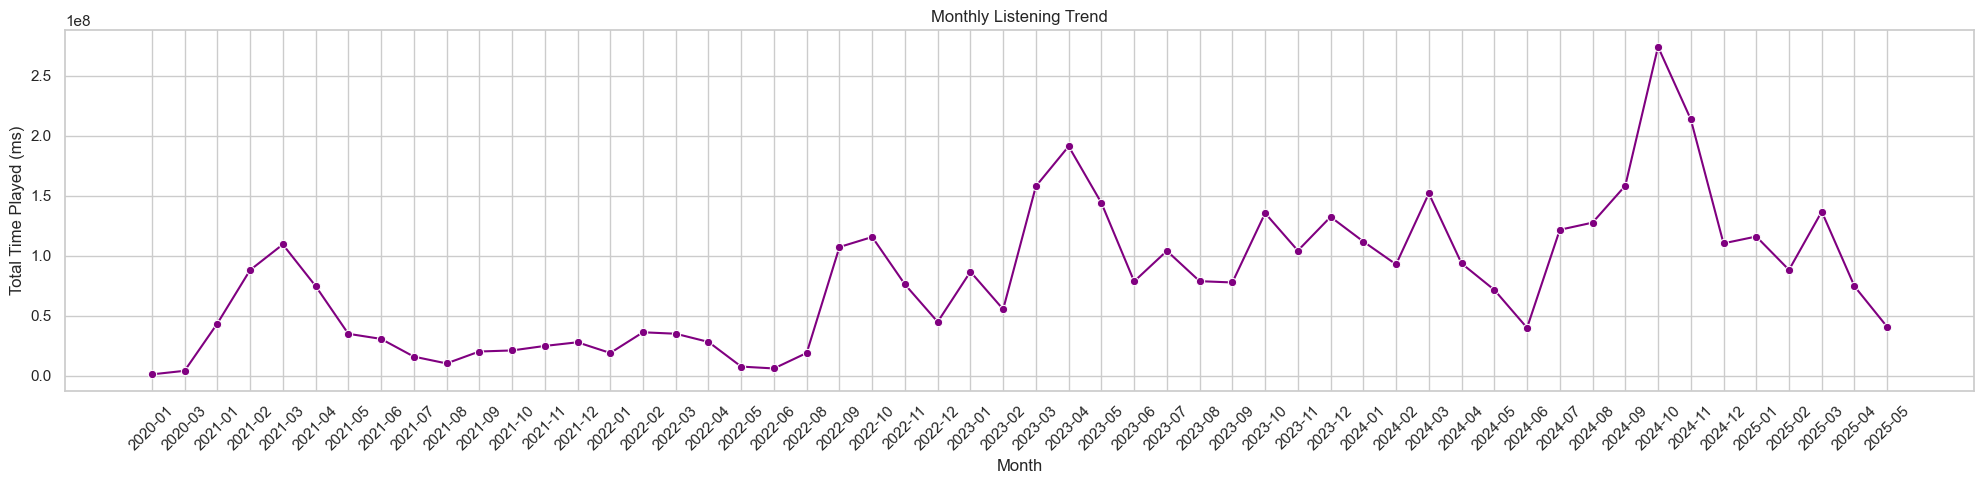

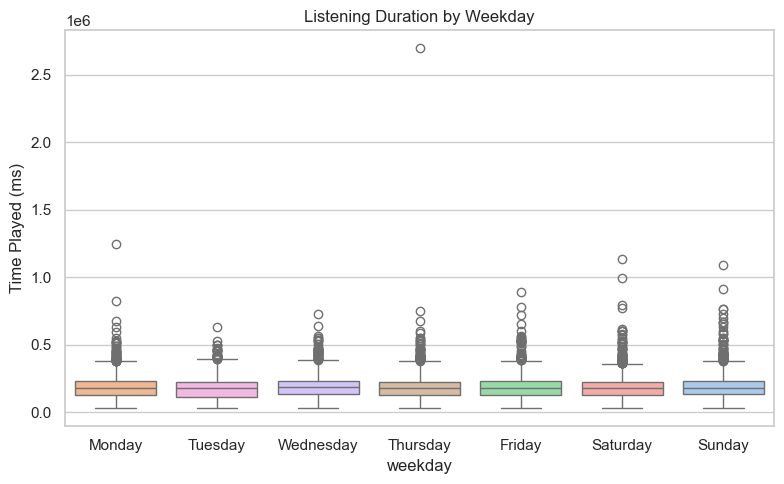

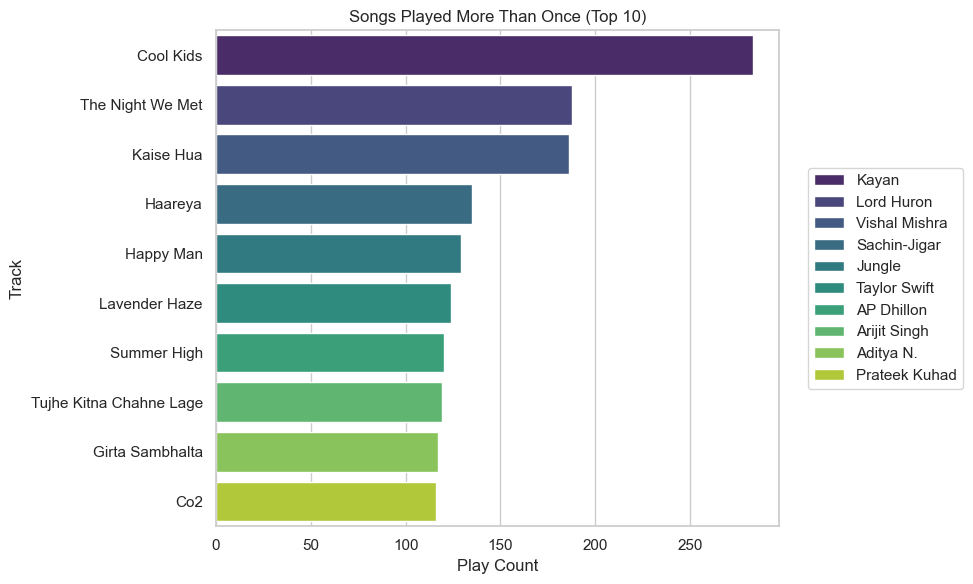

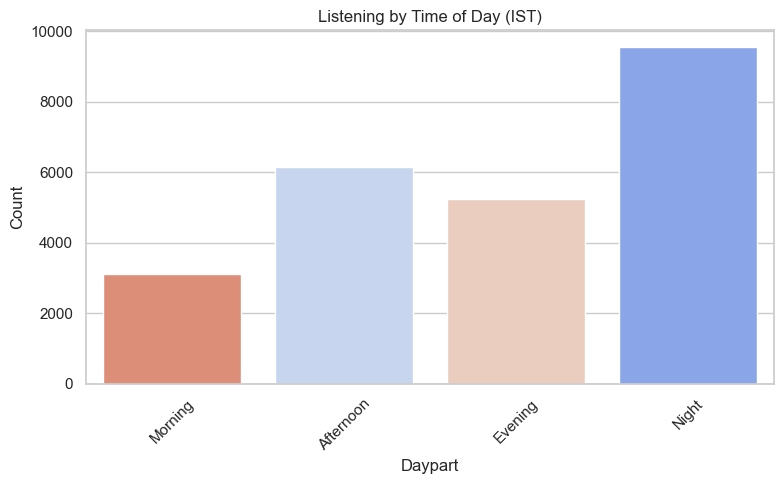

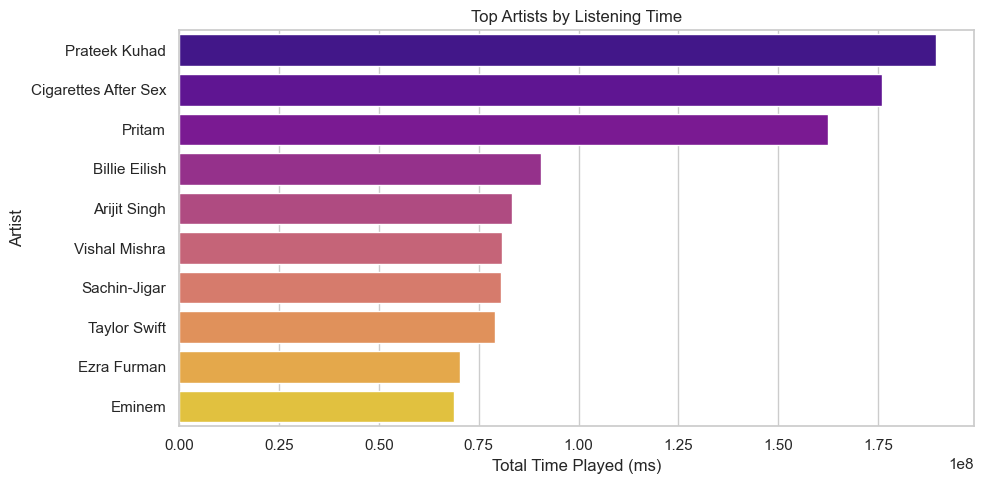

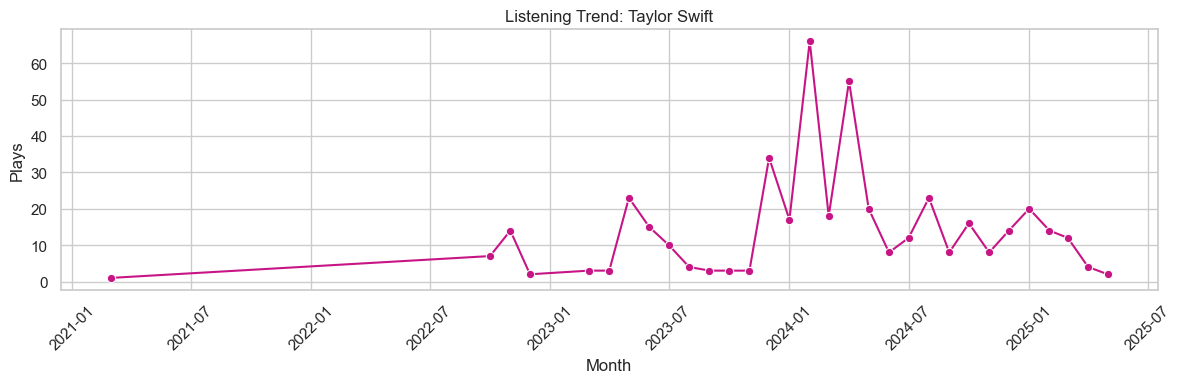

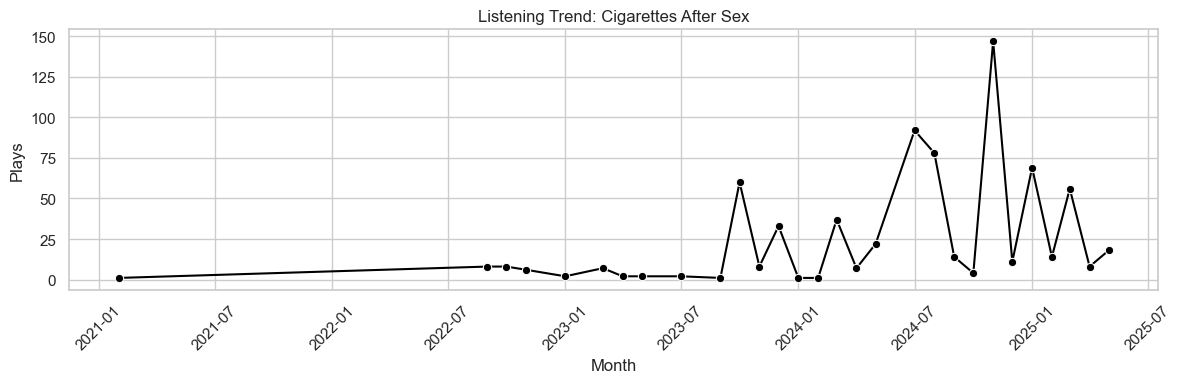

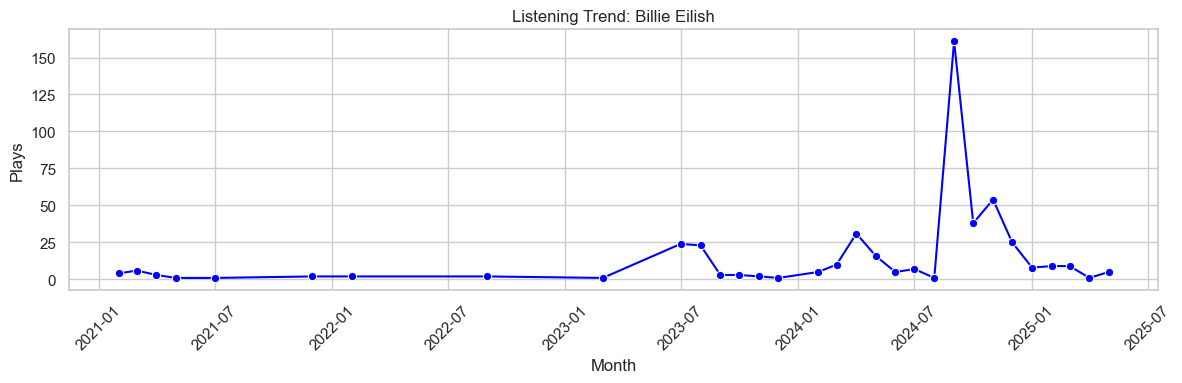

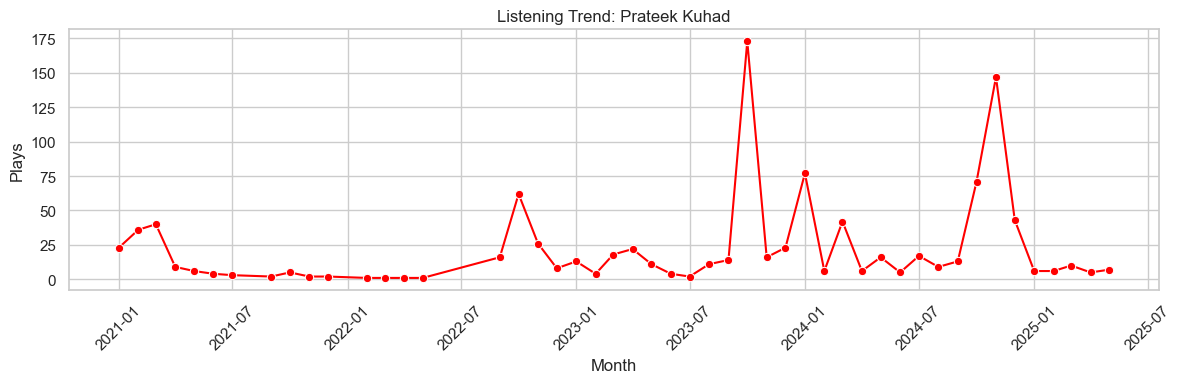

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set(style='whitegrid')

# Define the path to your Spotify data file
file_path = "cleaned_spotify_data.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Convert the 'ts' (timestamp) column to datetime objects
# Parse timestamps as UTC and then convert to 'Asia/Kolkata' timezone
df['ts'] = pd.to_datetime(df['ts'], utc=True).dt.tz_convert('Asia/Kolkata')

# Drop rows where 'ts' couldn't be parsed (i.e., contains NaT values)
df = df.dropna(subset=['ts'])

# --- Data Preprocessing and Feature Engineering ---

# Filter out non-music content and short listening sessions
# Keep only records where 'ms_played' (milliseconds played) is greater than 30 seconds (30000 ms)
df = df[df['ms_played'] > 30000]

# Keep only records where 'track' is not missing (i.e., it's a valid track)
df = df[df['track'].notna()]

# Note: The original column names 'track', 'artist', 'album' are already present
# in 'cleaned_spotify_data.csv', so the rename operation is not strictly necessary
# if using this specific file, but it's kept for robustness if column names vary.
# If your 'cleaned_spotify_data.csv' truly has 'master_metadata_track_name' etc.,
# you would need to uncomment and adjust the rename section.
# Based on previous `df.columns` output, 'track', 'artist', 'album' are already present.

# Extract time-based features from the 'ts' column
df['hour'] = df['ts'].dt.hour
df['weekday'] = df['ts'].dt.day_name()
df['year'] = df['ts'].dt.year

# Define a function to categorize hours into dayparts
def get_daypart(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the daypart function to create a new 'daypart' column
df['daypart'] = df['hour'].apply(get_daypart)

# Create a 'month' column by converting 'ts' to a Period object representing the month.
# Added .dt.tz_localize(None) to explicitly remove timezone information before
# converting to Period, which suppresses the UserWarning.
df['month'] = df['ts'].dt.tz_localize(None).dt.to_period('M')

# Print the time interval covered by the records for an overview
print("Time Interval of Records:", df['ts'].min(), "to", df['ts'].max())

# --- Data Visualization and Analysis ---

# 1. Top 10 Most Listened Artists (by Play Count)
top_artists_count = df['artist'].value_counts().head(10)
top_artists_count_df = pd.DataFrame({'artist': top_artists_count.index, 'play_count': top_artists_count.values})
plt.figure(figsize=(10, 5))
sns.barplot(data=top_artists_count_df, x='play_count', y='artist', hue='artist', palette='magma', legend=False)
plt.title("Top 10 Most Listened Artists (by Play Count)")
plt.xlabel("Play Count")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()

# 2. Top 10 Most Played Songs (by Play Count)
top_songs_count = df['track'].value_counts().head(10)
top_songs_count_df = pd.DataFrame({'song': top_songs_count.index, 'play_count': top_songs_count.values})
plt.figure(figsize=(10, 5))
sns.barplot(data=top_songs_count_df, x='play_count', y='song', hue='song', palette='viridis', legend=False)
plt.title("Top 10 Most Played Songs (by Play Count)")
plt.xlabel("Play Count")
plt.ylabel("Song")
plt.tight_layout()
plt.show()

# 3. Listening Activity by Hour of Day
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='hour', hue='hour', palette='coolwarm', legend=False)
plt.title("Listening Activity by Hour (IST)")
plt.xlabel("Hour of Day (IST)")
plt.ylabel("Number of Plays")
plt.tight_layout()
plt.show()

# 4. Listening Activity by Weekday
plt.figure(figsize=(10, 5))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='weekday', order=weekday_order, hue='weekday', palette='cubehelix', legend=False)
plt.title("Listening Activity by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Number of Plays")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Listening Patterns by Daypart
plt.figure(figsize=(8, 5))
daypart_order = ['Morning', 'Afternoon', 'Evening', 'Night']
sns.countplot(data=df, x='daypart', order=daypart_order, hue='daypart', palette='pastel', legend=False)
plt.title("Listening Patterns by Daypart (IST)")
plt.xlabel("Daypart")
plt.ylabel("Number of Plays")
plt.tight_layout()
plt.show()

# 6. Year-over-Year Listening Trends
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='year', hue='year', palette='Set2', legend=False)
plt.title("Year-over-Year Listening Trends")
plt.xlabel("Year")
plt.ylabel("Number of Plays")
plt.tight_layout()
plt.show()

# 7. Top Albums by Listening Time
if 'album' in df.columns:
    top_albums = df.groupby(['artist', 'album'])['ms_played'].sum().reset_index()
    top_albums = top_albums.sort_values(by='ms_played', ascending=False).head(10)

    plt.figure(figsize=(10,6))
    sns.barplot(data=top_albums, y='album', x='ms_played', hue='artist', dodge=False, palette='magma')
    plt.title('Top Albums by Listening Time')
    plt.xlabel('Total Time Played (ms)')
    plt.ylabel('Album')
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), borderaxespad=0.)
    plt.tight_layout()
    plt.show()

# 8. Monthly Listening Trend (Total Time Played)
monthly = df.groupby('month')['ms_played'].sum()
monthly.index = monthly.index.astype(str)

plt.figure(figsize=(20,5))
sns.lineplot(x=monthly.index, y=monthly.values, marker='o', color='purple')
plt.xticks(rotation=45)
plt.title('Monthly Listening Trend')
plt.xlabel('Month')
plt.ylabel('Total Time Played (ms)')
plt.tight_layout()
plt.show()

# 9. Listening Duration by Day of the Week (Box Plot)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='weekday', y='ms_played', hue='weekday', order=weekday_order, palette='pastel', legend=False)
plt.title('Listening Duration by Weekday')
plt.ylabel('Time Played (ms)')
plt.tight_layout()
plt.show()

# 10. Songs Played More Than Once (Top 10)
song_counts = df.groupby(['artist', 'track']).size().reset_index(name='count')
song_counts = song_counts[song_counts['count'] > 1].sort_values(by='count', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=song_counts.head(10), x='count', y='track', hue='artist', dodge=False, palette='viridis')
plt.title('Songs Played More Than Once (Top 10)')
plt.xlabel('Play Count')
plt.ylabel('Track')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), borderaxespad=0.)
plt.tight_layout()
plt.show()

# 11. Preferred Listening Time (Daypart) (Bar Plot of Total Counts)
if 'daypart' in df.columns:
    daypart_counts = df['daypart'].value_counts().reset_index()
    daypart_counts.columns = ['Daypart', 'Count']
    daypart_order = ['Morning', 'Afternoon', 'Evening', 'Night']

    plt.figure(figsize=(8,5))
    sns.barplot(data=daypart_counts, x='Daypart', y='Count', hue='Daypart', order=daypart_order, palette='coolwarm', legend=False)
    plt.title('Listening by Time of Day (IST)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 12. Top Artists by Listening Time (Total Milliseconds Played)
top_artists_time = df.groupby('artist')['ms_played'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_artists_time_df = top_artists_time.reset_index()
top_artists_time_df.columns = ['artist', 'ms_played']

sns.barplot(data=top_artists_time_df, x='ms_played', y='artist', hue='artist', palette='plasma', legend=False)
plt.title('Top Artists by Listening Time')
plt.xlabel('Total Time Played (ms)')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

# 13. Listening Trend for Specific Artists
def plot_artist_trend(artist_name, color='blue'):
    artist_df = df[df['artist'] == artist_name]
    if artist_df.empty:
        print(f"No data for {artist_name}")
        return

    # Group by month and count plays
    # Added .dt.tz_localize(None) to explicitly remove timezone information before
    # converting to Period, which suppresses the UserWarning.
    artist_monthly = artist_df.groupby(artist_df['ts'].dt.tz_localize(None).dt.to_period('M')).size().reset_index(name='play_count')
    artist_monthly['ts'] = artist_monthly['ts'].dt.to_timestamp()

    plt.figure(figsize=(12, 4))
    sns.lineplot(data=artist_monthly, x='ts', y='play_count', marker='o', color=color)
    plt.title(f'Listening Trend: {artist_name}')
    plt.xlabel('Month')
    plt.ylabel('Plays')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot listening trends for a selection of artists
plot_artist_trend("Taylor Swift", color='mediumvioletred')
plot_artist_trend("Cigarettes After Sex", color='black')
plot_artist_trend("Billie Eilish", color='blue')
plot_artist_trend("Prateek Kuhad", color='red')


In [ ]:
##First ML Project: Predict if You'll Skip a Song (Classification)
## Goal: Build a model that predicts whether you’ll skip a song based on your listening behavior

In [5]:
import os
os.getcwd()


'C:\\Users\\rahul\\Rahulpython'

In [ ]:
#Spotify Listening Patterns: Data Preparation and Machine Learning Model for Song Skipping Prediction

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Set seaborn style for better aesthetics
sns.set(style='whitegrid')

# Define the path to your Spotify data file
file_path = "cleaned_spotify_data.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Convert the 'ts' (timestamp) column to datetime objects
# Parse timestamps as UTC and then convert to 'Asia/Kolkata' timezone
df['ts'] = pd.to_datetime(df['ts'], utc=True).dt.tz_convert('Asia/Kolkata')

# Drop rows where 'ts' couldn't be parsed (i.e., contains NaT values)
df = df.dropna(subset=['ts'])

# --- Data Preprocessing and Feature Engineering (from previous steps) ---

# Filter out non-music content and short listening sessions
# Keep only records where 'ms_played' (milliseconds played) is greater than 30 seconds (30000 ms)
df = df[df['ms_played'] > 30000]

# Keep only records where 'track' is not missing (i.e., it's a valid track)
df = df[df['track'].notna()]

# Extract time-based features from the 'ts' column
df['hour'] = df['ts'].dt.hour
df['weekday'] = df['ts'].dt.day_name()
df['year'] = df['ts'].dt.year

# Define a function to categorize hours into dayparts
def get_daypart(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the daypart function to create a new 'daypart' column
df['daypart'] = df['hour'].apply(get_daypart)

# Create a 'month' column by converting 'ts' to a Period object representing the month.
# Added .dt.tz_localize(None) to explicitly remove timezone information before
# converting to Period, which suppresses the UserWarning.
df['month'] = df['ts'].dt.tz_localize(None).dt.to_period('M')

# Print the time interval covered by the records for an overview
print("Time Interval of Records:", df['ts'].min(), "to", df['ts'].max())

# --- Machine Learning Part ---

# Drop rows with missing 'skipped' values
df = df.dropna(subset=['skipped'])

# Select features
features = ['ms_played', 'hour', 'weekday', 'month']
df_ml = df[features + ['skipped']].copy() # Create a copy to avoid SettingWithCopyWarning

# Encode categorical features
# LabelEncoder for 'weekday' and 'month' is suitable for tree-based models
le_weekday = LabelEncoder()
df_ml['weekday'] = le_weekday.fit_transform(df_ml['weekday'])

le_month = LabelEncoder()
df_ml['month'] = le_month.fit_transform(df_ml['month'])

# Define X and y
X = df_ml.drop('skipped', axis=1)
y = df_ml['skipped']

# Standardize features
# While not strictly necessary for Random Forest, it's good practice for other models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
# Using stratify=y is important if 'skipped' is imbalanced
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print("\n--- Machine Learning Model Evaluation ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Time Interval of Records: 2020-01-19 23:48:10+05:30 to 2025-05-20 01:03:42+05:30

--- Machine Learning Model Evaluation ---
Confusion Matrix:
[[3357  317]
 [ 647  486]]

Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.91      0.87      3674
        True       0.61      0.43      0.50      1133

    accuracy                           0.80      4807
   macro avg       0.72      0.67      0.69      4807
weighted avg       0.78      0.80      0.79      4807



In [ ]:
#Hyperparameter Tuning and Evaluation of Random Forest Classifier for Song Skipping Prediction

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Setup GridSearchCV
grid = GridSearchCV(estimator=rf, param_grid=param_grid, 
                    cv=3, scoring='f1', n_jobs=-1, verbose=1)

# Fit the model
grid.fit(X_train, y_train)

# Show best parameters
print("Best Parameters:", grid.best_params_)

# Predict using the best estimator
best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Output results
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Confusion Matrix:
 [[3419  255]
 [ 652  481]]

Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.93      0.88      3674
        True       0.65      0.42      0.51      1133

    accuracy                           0.81      4807
   macro avg       0.75      0.68      0.70      4807
weighted avg       0.80      0.81      0.80      4807



In [ ]:
#Feature Importance Visualization for Tuned Random Forest Model

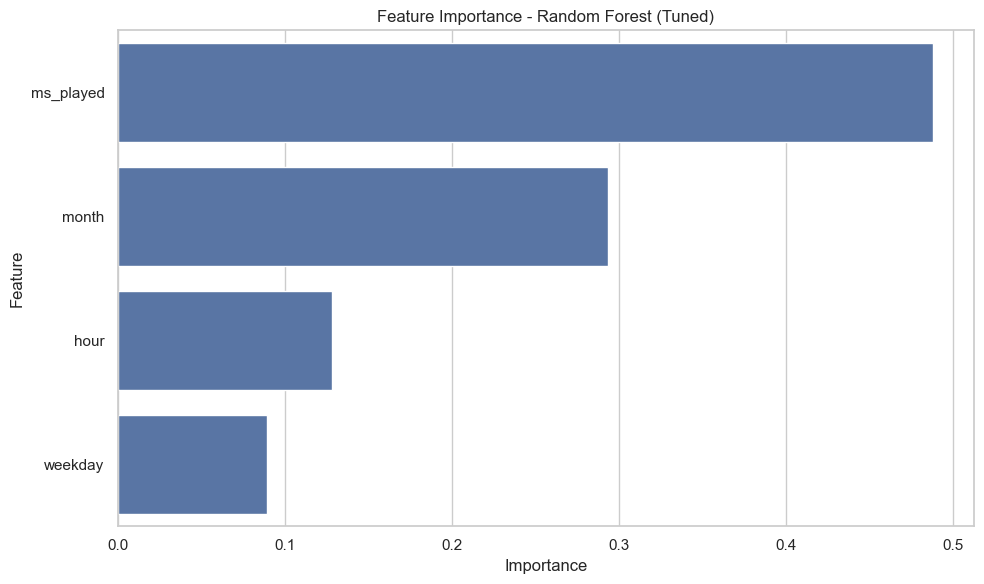

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = best_rf.feature_importances_
features = X.columns  # or just X.columns if you used that

# Create a DataFrame for visualization
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance - Random Forest (Tuned)")
plt.tight_layout()
plt.show()


In [ ]:
#Addressing Class Imbalance: Random Forest Classifier with `class_weight='balanced'`

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_balanced = RandomForestClassifier(
    class_weight='balanced',
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)

rf_balanced.fit(X_train, y_train)
y_pred = rf_balanced.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3241  433]
 [ 540  593]]
              precision    recall  f1-score   support

       False       0.86      0.88      0.87      3674
        True       0.58      0.52      0.55      1133

    accuracy                           0.80      4807
   macro avg       0.72      0.70      0.71      4807
weighted avg       0.79      0.80      0.79      4807



In [ ]:
#Feature Importance Visualization for Balanced and Tuned Random Forest Model

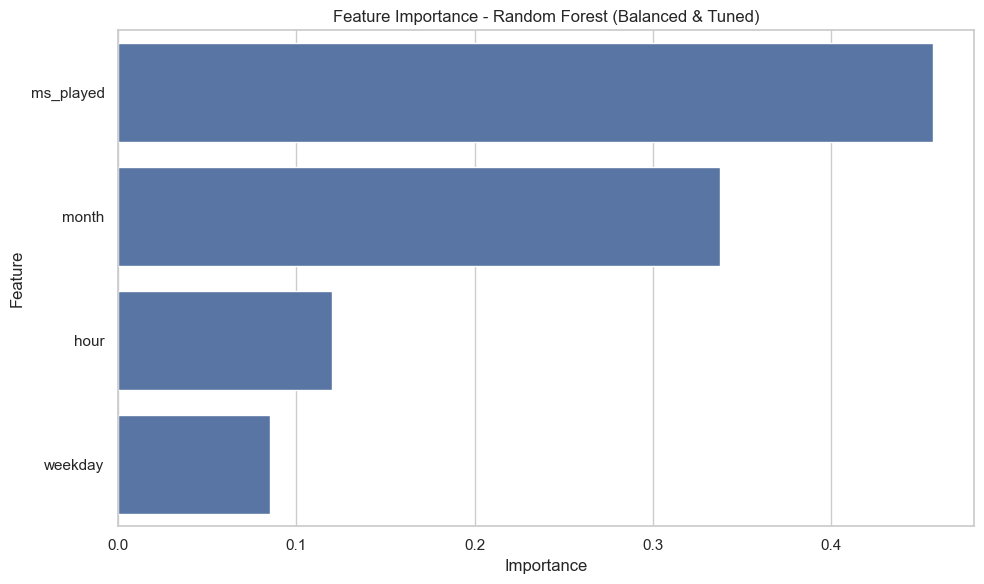

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances
importances = rf_balanced.feature_importances_
features = X.columns  # Use X here instead of X_train if it's the full DataFrame with named columns

# Create a DataFrame for visualization
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance - Random Forest (Balanced & Tuned)")
plt.tight_layout()
plt.show()


In [ ]:
#Receiver Operating Characteristic (ROC) Curve Analysis for Balanced Random Forest Mode

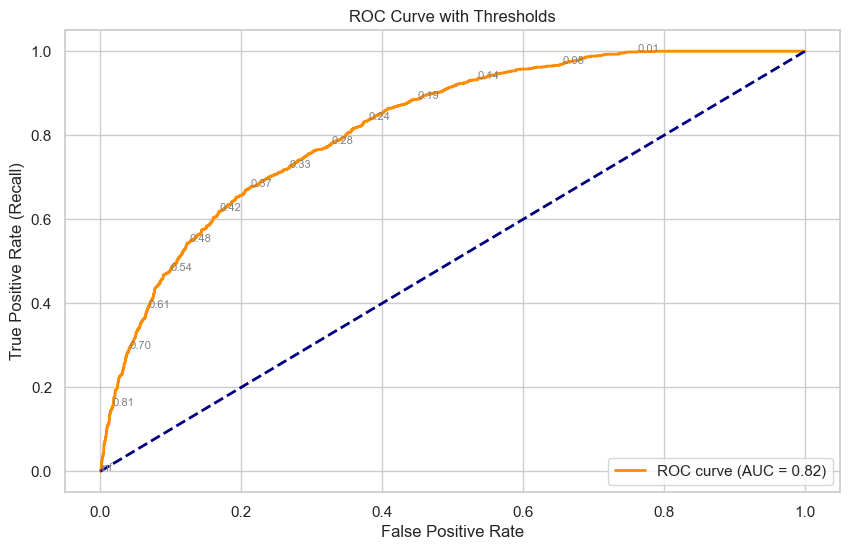

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get ROC data
y_proba = rf_balanced.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve with Thresholds')
plt.grid(True)

# Add threshold labels
for i in range(0, len(thresholds), 100):  # skip every 100 for clarity
    plt.annotate(f"{thresholds[i]:.2f}", (fpr[i], tpr[i]), fontsize=8, color='gray')

plt.legend(loc="lower right")
plt.show()


In [ ]:
#code to print the thresholds:

In [11]:
from sklearn.metrics import roc_curve

# Get predicted probabilities
y_proba = rf_balanced.predict_proba(X_test)[:, 1]

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Print first 10 threshold values
print("Thresholds (first 10):")
for i, thr in enumerate(thresholds[:10]):
    print(f"{i+1}: {thr:.4f}")


Thresholds (first 10):
1: inf
2: 0.9811
3: 0.9810
4: 0.9743
5: 0.9566
6: 0.9537
7: 0.9508
8: 0.9504
9: 0.9393
10: 0.9392


In [ ]:
#Visualizing ROC Curve and Confusion Matrix for Model Evaluation

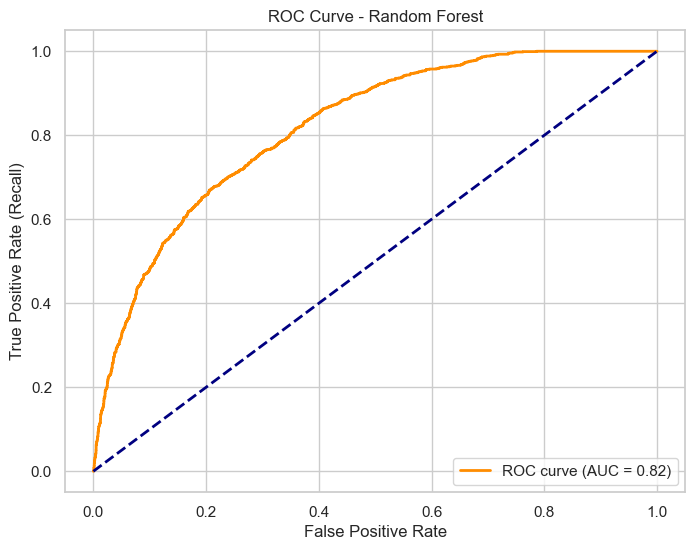

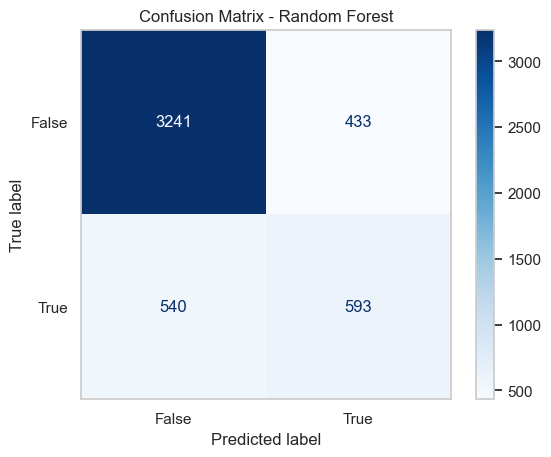

In [12]:
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# ROC Curve
y_proba = rf_balanced.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Confusion Matrix Heatmap
ConfusionMatrixDisplay.from_estimator(rf_balanced, X_test, y_test, cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Random Forest')
plt.grid(False)
plt.show()


In [ ]:
#Stratified K-Fold Cross-Validation for Model Accuracy Evaluation

In [13]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_balanced, X, y, cv=cv, scoring='accuracy')

print("Stratified CV Accuracy Scores:", cv_scores)
print("Mean Accuracy: {:.2f}%".format(cv_scores.mean() * 100))
print("Standard Deviation: {:.2f}".format(cv_scores.std()))


Stratified CV Accuracy Scores: [0.79467443 0.79255098 0.79338327 0.7985851  0.79733666]
Mean Accuracy: 79.53%
Standard Deviation: 0.00


In [ ]:
#Stratified K-Fold Cross-Validation for Model AUC Evaluation

In [14]:
cv_auc_scores = cross_val_score(rf_balanced, X, y, cv=cv, scoring='roc_auc')

print("Stratified CV AUC Scores:", cv_auc_scores)
print("Mean AUC: {:.2f}".format(cv_auc_scores.mean()))


Stratified CV AUC Scores: [0.81824272 0.82339237 0.81668012 0.82821556 0.82526987]
Mean AUC: 0.82


In [ ]:
#Precision-Recall Curve Analysis for Model Evaluation

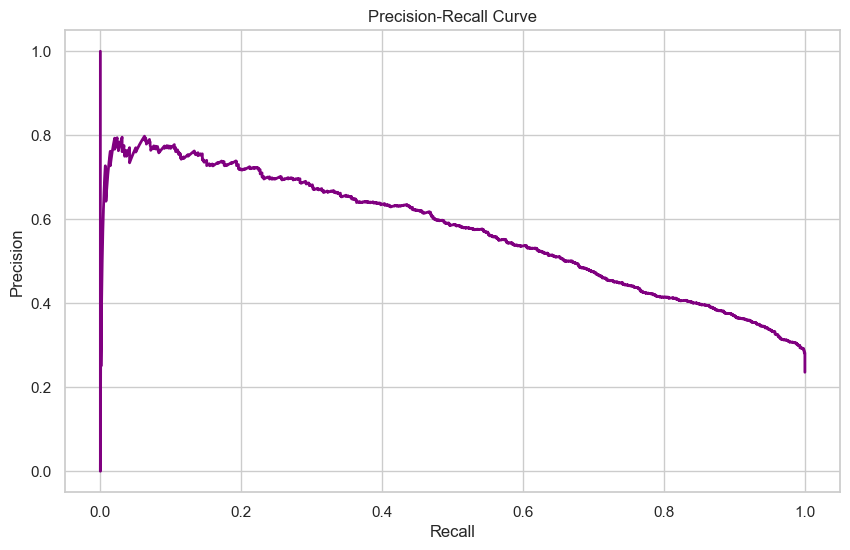

In [15]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='purple', lw=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()


In [ ]:
#Complete Spotify Song Skipping Prediction Pipeline: Data Preparation, Model Training, Saving, Loading & Inference

In [16]:
# FULL SCRIPT: Train, Save, Load, Predict

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import joblib

# ----------------------------
# Step 1: Load and preprocess data
# ----------------------------
# Replace with your actual file path
data = pd.read_csv('C:\\Users\\rahul\\Rahulpython\\cleaned_spotify_data.csv')

# Encode 'weekday' and 'month' if they are strings
le_weekday = LabelEncoder()
le_month = LabelEncoder()

data['weekday'] = le_weekday.fit_transform(data['weekday'])
data['month'] = le_month.fit_transform(data['month'])

# Features and target
X = data[['ms_played', 'hour', 'weekday', 'month']]
y = data['skipped']

# ----------------------------
# Step 2: Split and scale
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------
# Step 3: Handle class imbalance
# ----------------------------
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train_scaled, y_train)

# ----------------------------
# Step 4: Train model
# ----------------------------
rf_balanced = RandomForestClassifier(random_state=42)
rf_balanced.fit(X_train_balanced, y_train_balanced)

# ----------------------------
# Step 5: Save model and scaler
# ----------------------------
joblib.dump(rf_balanced, 'C:\\Users\\rahul\\Rahulpython\\new_model.pkl')
joblib.dump(scaler, 'C:\\Users\\rahul\\Rahulpython\\scaler.pkl')

# ----------------------------
# Step 6: Predict on new input
# ----------------------------
# New input (make sure values are already encoded if needed)
new_input = pd.DataFrame([{
    'ms_played': 90000,
    'hour': 8,
    'weekday': 0,
    'month': 1
}])

# Load saved model and scaler
model = joblib.load('C:\\Users\\rahul\\Rahulpython\\new_model.pkl')
scaler = joblib.load('C:\\Users\\rahul\\Rahulpython\\scaler.pkl')

# Scale new input
new_input_scaled = scaler.transform(new_input)

# Predict
prediction = model.predict(new_input_scaled)
probability = model.predict_proba(new_input_scaled)

print("Prediction:", "Skipped" if prediction[0] == 1 else "Not Skipped")
print(f"Probability of being skipped: {probability[0][1]:.2f}")


Prediction: Not Skipped
Probability of being skipped: 0.00


In [ ]:
#Test data 1

In [66]:
# Create sample input data WITH FEATURE NAMES MATCHING TRAINING DATA
new_input = pd.DataFrame([{
    'ms_played': 200,      # very short
    'hour': 3,             # early morning
    'weekday': 1,          # Tuesday
    'month': 2             # February
}])

# Convert to numpy array to remove feature names (if model was trained without them)
prediction = model.predict(new_input.values)  # .values converts to numpy array
probability = model.predict_proba(new_input.values)

# Alternative: If you want to keep DataFrame format, ensure model was trained with feature names
# (Best solution is to train model with pandas DataFrame to preserve feature names)

print("\n--- Prediction Results ---")
print("Prediction:", "Skipped" if prediction[0] == 1 else "Not Skipped")
print(f"Probability of being skipped: {probability[0][1]:.2f}")


--- Prediction Results ---
Prediction: Skipped
Probability of being skipped: 0.54


In [ ]:
#Test data 2

In [67]:
# Create sample input data WITH FEATURE NAMES MATCHING TRAINING DATA
new_input = pd.DataFrame([{
    'ms_played': 90000,    # 1.5 minutes
    'hour': 13,            # 1 PM
    'weekday': 4,          # Friday
    'month': 10            # October
}])

# Convert to numpy array to remove feature names (if model was trained without them)
prediction = model.predict(new_input.values)  # .values converts to numpy array
probability = model.predict_proba(new_input.values)

# Alternative: If you want to keep DataFrame format, ensure model was trained with feature names
# (Best solution is to train model with pandas DataFrame to preserve feature names)

print("\n--- Prediction Results ---")
print("Prediction:", "Skipped" if prediction[0] == 1 else "Not Skipped")
print(f"Probability of being skipped: {probability[0][1]:.2f}")


--- Prediction Results ---
Prediction: Not Skipped
Probability of being skipped: 0.45


In [ ]:
#Inserting multing test data in loop

In [68]:
import pandas as pd
import numpy as np

# List of new test inputs
inputs = [
    {'ms_played': 180000, 'hour': 15, 'weekday': 2, 'month': 5},
    {'ms_played': 30000, 'hour': 22, 'weekday': 6, 'month': 12},
    {'ms_played': 90000, 'hour': 8, 'weekday': 0, 'month': 1},
]

# Convert to DataFrame
df_inputs = pd.DataFrame(inputs)

# Add cyclical features (only if your model was trained with these)
# If model doesn't use cyclical features, remove this section
df_inputs['hour_sin'] = np.sin(2 * np.pi * df_inputs['hour'] / 24)
df_inputs['hour_cos'] = np.cos(2 * np.pi * df_inputs['hour'] / 24)
df_inputs['weekday_sin'] = np.sin(2 * np.pi * df_inputs['weekday'] / 7)
df_inputs['weekday_cos'] = np.cos(2 * np.pi * df_inputs['weekday'] / 7)
df_inputs['month_sin'] = np.sin(2 * np.pi * df_inputs['month'] / 12)
df_inputs['month_cos'] = np.cos(2 * np.pi * df_inputs['month'] / 12)

# Convert to numpy array to match training format
X_test = df_inputs[['ms_played', 'hour', 'weekday', 'month']].values  # Added .values

# Predict using numpy array format
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)

# Add results to DataFrame
df_inputs['prediction'] = ['Skipped' if p == 1 else 'Not Skipped' for p in predictions]
df_inputs['prob_skipped'] = [round(prob[1], 2) for prob in probabilities]

# Display results (modified to show relevant columns)
print(df_inputs[['ms_played', 'hour', 'weekday', 'month', 'prediction', 'prob_skipped']])

   ms_played  hour  weekday  month   prediction  prob_skipped
0     180000    15        2      5  Not Skipped          0.45
1      30000    22        6     12  Not Skipped          0.45
2      90000     8        0      1  Not Skipped          0.09


In [ ]:
#Saving prediction model

In [69]:
df_inputs.to_csv("model_predictions.csv", index=False)
print("Predictions saved to model_predictions.csv")


Predictions saved to model_predictions.csv


In [ ]:
# Saving the model to your custom path

In [70]:
import joblib

# Save the model to your custom path
joblib.dump(rf_balanced, 'C:\\Users\\rahul\\Rahulpython\\new_model.pkl')


['C:\\Users\\rahul\\Rahulpython\\new_model.pkl']

In [ ]:
#Cluster Listening Patterns



--- Cluster-wise Average Listening Behavior ---

   Cluster   Avg Hour  Avg Weekday (Encoded)  Avg ms_played  \
0        0  11.832820               3.094064  143477.406654   
1        1  13.609125               1.351714  188117.579968   
2        2  12.276587               3.347877  187959.337748   
3        3  12.316504               4.747083  195289.709455   

   Shuffle Usage Rate  Skip Rate Most Used Platform  
0                 0.0   1.000000            android  
1                 0.0   0.000244            android  
2                 1.0   0.305025            android  
3                 0.0   0.001072            android  


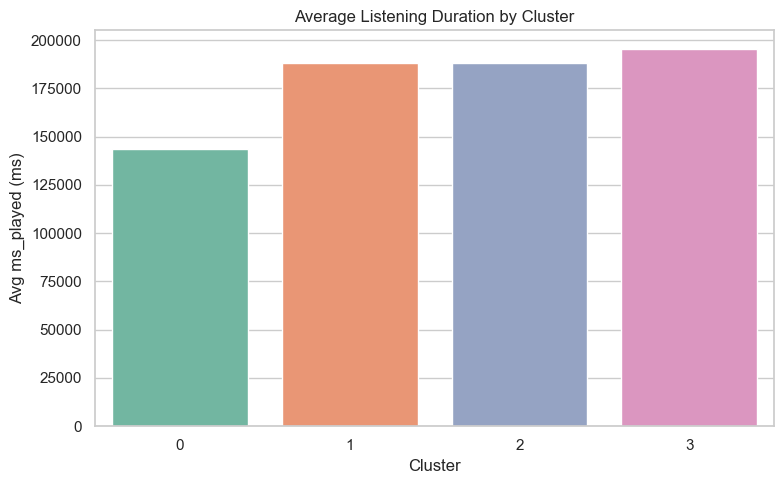

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
# Using the user-provided clustered_spotify_data.csv for this task
df = pd.read_csv("clustered_spotify_data.csv")

# Optional: ensure 'cluster' column exists
if 'cluster' not in df.columns:
    raise ValueError("No 'cluster' column found in the data!")

# Compute average behavior per cluster
# Note: 'weekday' and 'month' columns are likely label-encoded numerical values.
# Taking the 'mean' of these for cluster interpretation is not directly meaningful
# in terms of original categories. For a more robust interpretation of categorical
# features, you'd typically use the 'mode' (most frequent value) or decode them
# back to their original string representations if the LabelEncoder mapping is available.
# However, for this specific request, we'll stick to the aggregation as provided,
# and only fix the plotting warning.
cluster_behavior = df.groupby('cluster').agg({
    'hour': 'mean',
    'weekday': 'mean', # Keep as mean, but note it's on encoded values
    'ms_played': 'mean',
    'shuffle': 'mean',
    'skipped': 'mean',
    'platform': lambda x: x.mode()[0]  # most common platform
}).reset_index()

# Rename columns for clarity
cluster_behavior.columns = [
    'Cluster', 'Avg Hour', 'Avg Weekday (Encoded)', 'Avg ms_played',
    'Shuffle Usage Rate', 'Skip Rate', 'Most Used Platform'
]

print("\n--- Cluster-wise Average Listening Behavior ---\n")
print(cluster_behavior)

# Optional: Save to CSV
# This path should be adjusted if you want to save it elsewhere
cluster_behavior.to_csv("cluster_listening_patterns.csv", index=False)

# Optional Plot: Average ms_played per cluster 
plt.figure(figsize=(8, 5))
# FIX: Assign 'Cluster' to 'hue' and set 'legend=False' to address the FutureWarning
sns.barplot(data=cluster_behavior, x='Cluster', y='Avg ms_played', hue='Cluster', palette='Set2', legend=False)
plt.title('Average Listening Duration by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Avg ms_played (ms)')
plt.tight_layout()
plt.show()


In [ ]:
#Apply KMeans Clustering

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load your clustered Spotify CSV file
df = pd.read_csv(r"C:\Users\rahul\Rahulpython\clustered_spotify_data.csv")

In [42]:
# Select relevant features for clustering
features = ['hour', 'weekday', 'ms_played', 'shuffle', 'skipped']
df_clustering = df[features].copy()

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clustering)

In [ ]:
# Elbow Method to find optimal k

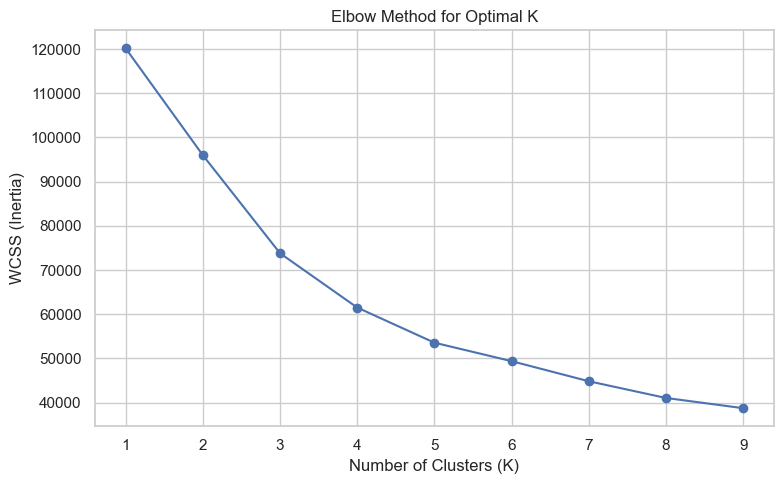

In [71]:
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot WCSS curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.xticks(range(1, 10))
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Apply KMeans clustering after finding optimum k

In [44]:
optimal_k = 4  # You can change this based on the Elbow graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Save the clustered data
df.to_csv(r"C:\Users\rahul\Rahulpython\clustered_spotify_data_with_kmeans.csv", index=False)

print("Clustering complete. File saved as 'clustered_spotify_data_with_kmeans.csv'")

Clustering complete. File saved as 'clustered_spotify_data_with_kmeans.csv'


In [ ]:
#Cluster Naming

In [45]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv(r"C:\Users\rahul\Rahulpython\clustered_spotify_data.csv")

# Step 2: Convert non-numeric columns (e.g., booleans or object dtypes) to numeric
df['shuffle'] = df['shuffle'].astype(int) if df['shuffle'].dtype == 'bool' else pd.to_numeric(df['shuffle'], errors='coerce')
df['skipped'] = df['skipped'].astype(int) if df['skipped'].dtype == 'bool' else pd.to_numeric(df['skipped'], errors='coerce')

# Step 3: Drop any non-numeric or irrelevant columns if needed
# (like song name, artist, etc., if present and not useful for clustering)
# df = df.drop(['track_name', 'artist_name'], axis=1)  # Uncomment if needed

# Step 4: Cluster-wise summary statistics (mean of each feature)
cluster_summary = df.groupby('cluster')[['hour', 'weekday', 'ms_played', 'shuffle', 'skipped']].mean()
print("--- CLUSTER SUMMARY ---")
print(cluster_summary)

# Step 5: Optional - Find the most common platform per cluster
print("\n--- DOMINANT PLATFORM PER CLUSTER ---")
dominant_platform = df.groupby('cluster')['platform'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
print(dominant_platform)

--- CLUSTER SUMMARY ---
              hour   weekday      ms_played  shuffle   skipped
cluster                                                       
0        11.832820  3.094064  143477.406654      0.0  1.000000
1        13.609125  1.351714  188117.579968      0.0  0.000244
2        12.276587  3.347877  187959.337748      1.0  0.305025
3        12.316504  4.747083  195289.709455      0.0  0.001072

--- DOMINANT PLATFORM PER CLUSTER ---
cluster
0    android
1    android
2    android
3    android
Name: platform, dtype: object


In [151]:
print(df['cluster'].unique())

[3 1 2 0]


In [46]:
import pandas as pd

# Load data
df = pd.read_csv(r"C:\Users\rahul\Rahulpython\clustered_spotify_data.csv")

# Step 1: View unique clusters
print("Unique clusters:", df['cluster'].unique())

# Step 2: Create a dictionary for cluster naming
cluster_names = {
    0: 'Late Night Skippers',
    1: 'Morning Focused Listeners',
    2: 'Casual All-day Streamers',
    3: 'Evening Explorers'
}

# Step 3: Map cluster numbers to readable names
df['cluster_name'] = df['cluster'].map(cluster_names)

# Step 4: Check if mapping is done correctly
print("\nCluster to Name Mapping:")
print(df[['cluster', 'cluster_name']].drop_duplicates().sort_values(by='cluster'))

# Step 5: Optional – see how many entries belong to each cluster
print("\nCluster distribution:")
print(df['cluster_name'].value_counts())

# Optional: Save the updated dataframe if needed
df.to_csv(r"C:\Users\rahul\Rahulpython\clustered_spotify_named.csv", index=False)

Unique clusters: [3 1 2 0]

Cluster to Name Mapping:
      cluster               cluster_name
4906        0        Late Night Skippers
43          1  Morning Focused Listeners
90          2   Casual All-day Streamers
0           3          Evening Explorers

Cluster distribution:
cluster_name
Evening Explorers            8398
Morning Focused Listeners    8197
Late Night Skippers          4869
Casual All-day Streamers     2567
Name: count, dtype: int64


In [47]:
print("--- CLUSTER BEHAVIOR SUMMARY ---")
print(df.groupby("cluster_name")[["hour", "weekday", "ms_played", "shuffle", "skipped"]].mean().round(2))

--- CLUSTER BEHAVIOR SUMMARY ---
                            hour  weekday  ms_played  shuffle  skipped
cluster_name                                                          
Casual All-day Streamers   12.28     3.35  187959.34      1.0     0.31
Evening Explorers          12.32     4.75  195289.71      0.0     0.00
Late Night Skippers        11.83     3.09  143477.41      0.0     1.00
Morning Focused Listeners  13.61     1.35  188117.58      0.0     0.00


In [ ]:
#Reccomendation per cluster

In [52]:
import pandas as pd

# Load the clustered data (adjust filename if needed)
df = pd.read_csv(r"C:\Users\rahul\Rahulpython\clustered_spotify_named.csv")

# Step 1: Define final cluster name mapping (based on your last output)
cluster_names = {
    0: "Late Night Skippers",
    1: "Morning Focused Listeners",
    2: "Casual All-day Streamers",
    3: "Evening Explorers"
}

# Step 2: Group by cluster, track, and artist to get average ms_played
top_tracks_per_cluster = (
    df.groupby(['cluster', 'track', 'artist'])['ms_played']
    .mean()
    .reset_index()
    .sort_values(['cluster', 'ms_played'], ascending=[True, False])
)

# Step 3: Get top 5 tracks per cluster
top_recommendations = (
    top_tracks_per_cluster.groupby('cluster')
    .head(5)
    .reset_index(drop=True)
)

# Step 4: Add cluster names
top_recommendations['cluster_name'] = top_recommendations['cluster'].map(cluster_names)

# Step 5: Save recommendations to CSV
top_recommendations.to_csv('top_5_recommendations_per_cluster.csv', index=False)

# Step 6: Print nicely in console
print("\n--- Top Song Recommendations per Cluster ---\n")
for cluster_id in sorted(top_recommendations['cluster'].unique()):
    print(f"\nCluster {cluster_id} – {cluster_names.get(cluster_id, 'Unnamed Cluster')}:")
    cluster_tracks = top_recommendations[top_recommendations['cluster'] == cluster_id]
    for idx, row in cluster_tracks.iterrows():
        print(f"  • {row['track']} by {row['artist']}")


--- Top Song Recommendations per Cluster ---


Cluster 0 – Late Night Skippers:
  • Chaiyya Chaiyya by Sukhwinder Singh
  • Jo Pyaar Karta Hai by Manohar Shetty
  • Bekhayali (From "Kabir Singh") by Sachet Tandon
  • Raat Baaqi Baat Baaqi by Shashi Kapoor
  • Aaye Ho Meri Zindagi Mein - Male Version by Udit Narayan

Cluster 1 – Morning Focused Listeners:
  • Shree Hanuman Chalisa by Hariharan
  • Om Shanti Om - Meri Umar Ke Naujawano by Kishore Kumar
  • Meethe Rash Se Bhari Radha Rani Lage by Rakesh Kala
  • Kabhi Ram Banke Kabhi Sham Banke by Anjali Jain
  • Ye Kaali Kaali Aankhen by Kumar Sanu

Cluster 2 – Casual All-day Streamers:
  • Chhupana Bhi Nahin Aata by Vinod Rathod
  • Tum Ho by Mohit Chauhan
  • The Breeze / My Baby Cries by Bill Callahan
  • Mitwa (From "Kabhi Alvida Naa Kehna") by Shankar-Ehsaan-Loy
  • Ek Pal Ka Jeena by Lucky Ali

Cluster 3 – Evening Explorers:
  • Barsane Wali Radhe by Mridul Krishnan Shastri
  • Om Shanti Om - Meri Umar Ke Naujawano by Kishore Kuma

In [ ]:
#Spotify Listening Clusters: Behavior Summary and Visualization


--- Cluster Behavior Summary ---

                cluster_name  avg_listening_hour  avg_skip_rate  \
0   Casual All-day Streamers           12.276587       0.305025   
1          Evening Explorers           12.316504       0.001072   
2        Late Night Skippers           11.832820       1.000000   
3  Morning Focused Listeners           13.609125       0.000244   

   avg_shuffle_usage  total_streams  
0                1.0           2567  
1                0.0           8398  
2                0.0           4869  
3                0.0           8197  


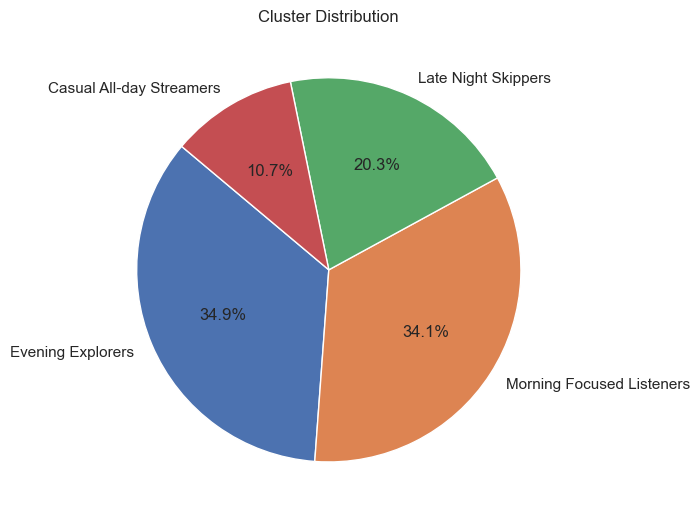

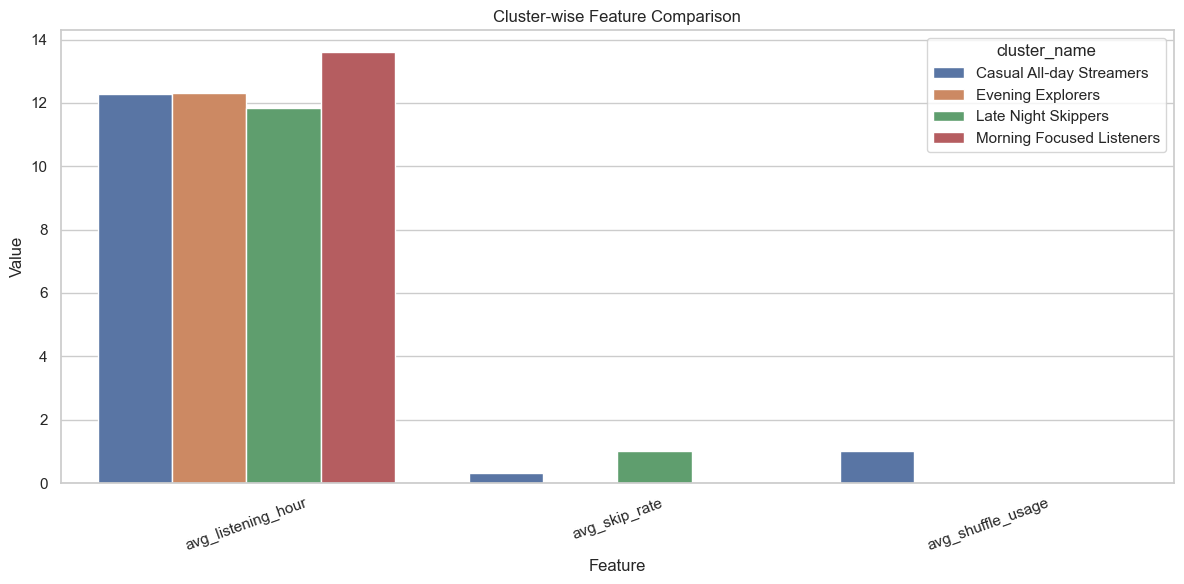

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your clustered dataset
df = pd.read_csv(r"C:\Users\rahul\Rahulpython\clustered_spotify_named.csv")

# Cluster names
cluster_names = {
    0: "Late Night Skippers",
    1: "Morning Focused Listeners",
    2: "Casual All-day Streamers",
    3: "Evening Explorers"
}
df['cluster_name'] = df['cluster'].map(cluster_names)

# Step 1: Cluster Behavior Summary
summary = df.groupby('cluster_name').agg({
    'hour': 'mean',
    'skipped': 'mean',
    'shuffle': 'mean',
    'track': 'count'
}).rename(columns={
    'hour': 'avg_listening_hour',
    'skipped': 'avg_skip_rate',
    'shuffle': 'avg_shuffle_usage',
    'track': 'total_streams'
}).reset_index()

print("\n--- Cluster Behavior Summary ---\n")
print(summary)

# Step 2.1: Pie Chart of Cluster Distribution
plt.figure(figsize=(7, 7))
df['cluster_name'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Cluster Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Step 2.2: Bar Charts of Features
plt.figure(figsize=(12, 6))
melted = summary.melt(id_vars='cluster_name', 
                      value_vars=['avg_listening_hour', 'avg_skip_rate', 'avg_shuffle_usage'],
                      var_name='Feature', value_name='Value')

sns.barplot(data=melted, x='Feature', y='Value', hue='cluster_name')
plt.title('Cluster-wise Feature Comparison')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

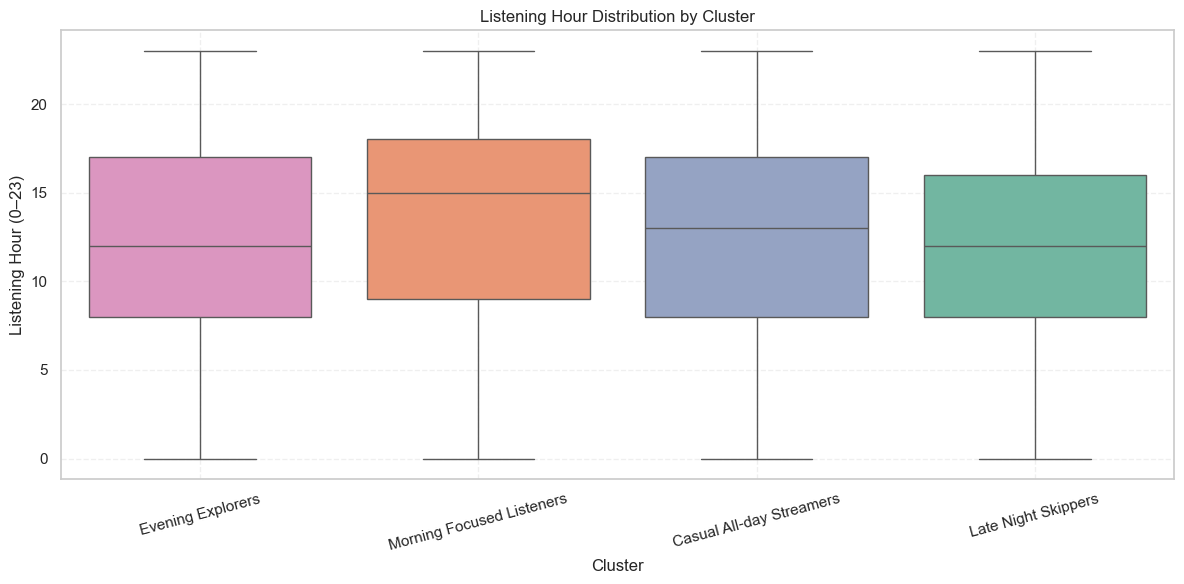

In [54]:
# Listening Time Distribution (Hour-wise)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cluster_name', y='hour', palette='Set2',legend=False,hue='cluster')
plt.title('Listening Hour Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Listening Hour (0–23)')
plt.xticks(rotation=15)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

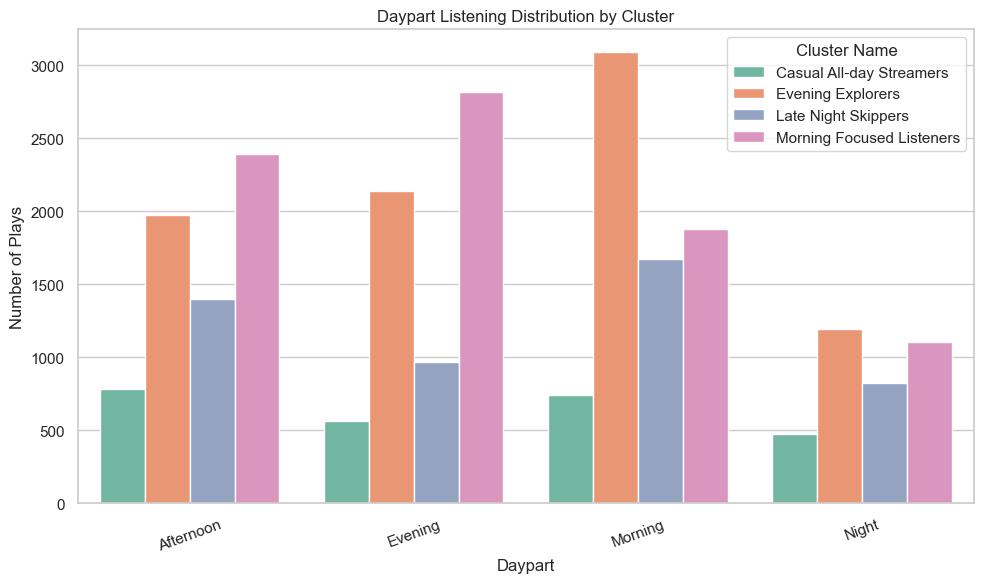

In [55]:
# Daypart Patterns (Cluster-wise Listening Distribution)
import matplotlib.pyplot as plt
import seaborn as sns

# Group by cluster_name and daypart
daypart_dist = df.groupby(['cluster_name', 'daypart']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(data=daypart_dist, x='daypart', y='count', hue='cluster_name', palette='Set2')
plt.title('Daypart Listening Distribution by Cluster')
plt.xlabel('Daypart')
plt.ylabel('Number of Plays')

# Legend will auto-match cluster_name colors from graph
plt.legend(title='Cluster Name', loc='upper right')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

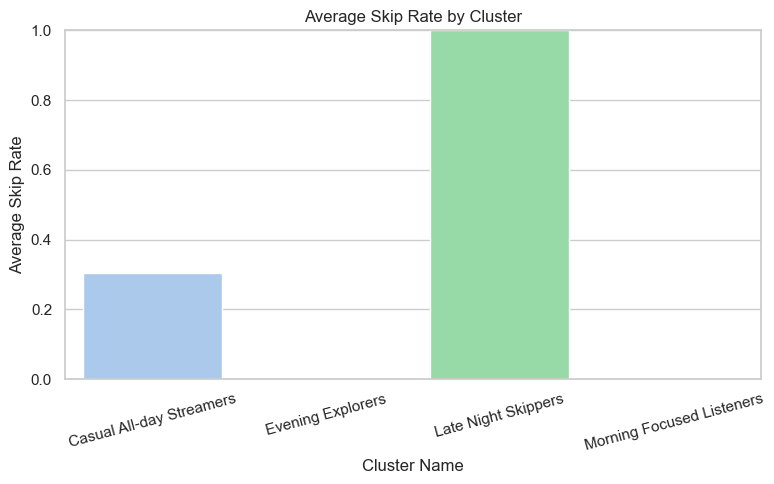

In [63]:
# Skip Behavior – Average Skip Rate per Cluster
import matplotlib.pyplot as plt
import seaborn as sns

# Group by cluster_name and calculate average skip rate
skip_ratio = df.groupby('cluster_name')['skipped'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=skip_ratio, x='cluster_name', y='skipped', palette='pastel',hue='cluster_name' ,legend=False)
plt.title('Average Skip Rate by Cluster')
plt.xlabel('Cluster Name')
plt.ylabel('Average Skip Rate')
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

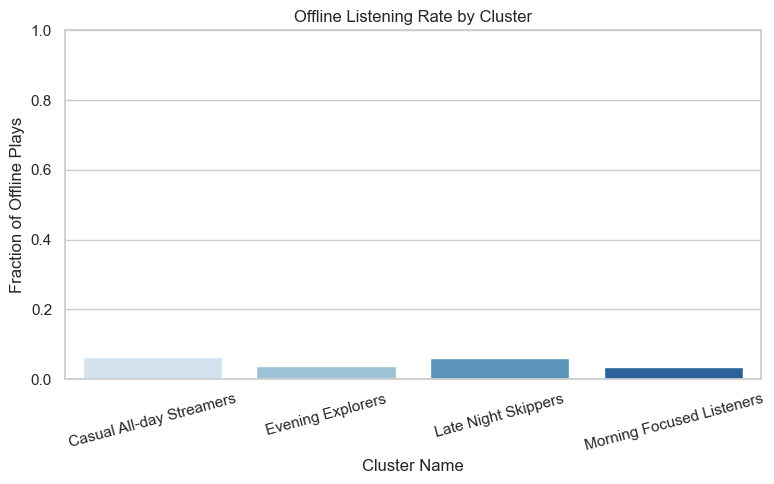

In [62]:
# Offline vs Online Listening – Fraction of Offline Plays per Cluster
import matplotlib.pyplot as plt
import seaborn as sns

# Group by cluster_name and calculate average offline rate
offline_dist = df.groupby('cluster_name')['offline'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=offline_dist, x='cluster_name', y='offline', palette='Blues',hue='cluster_name' ,legend=False)
plt.title('Offline Listening Rate by Cluster')
plt.xlabel('Cluster Name')
plt.ylabel('Fraction of Offline Plays')
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

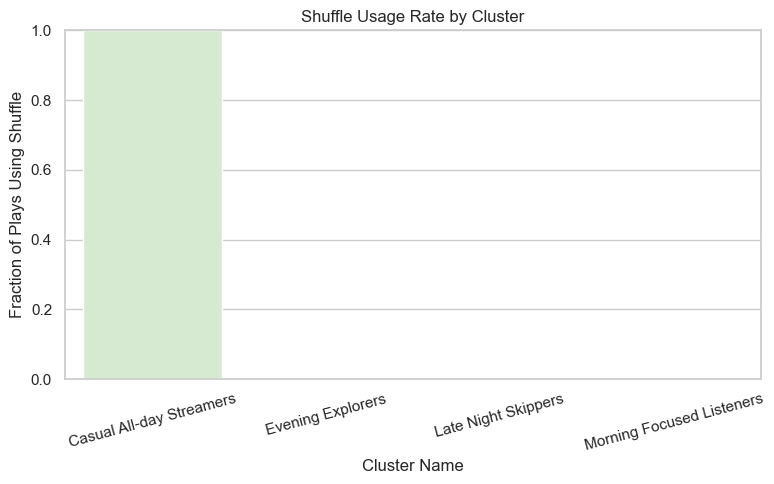

In [64]:
# Shuffle Usage by Cluster
shuffle_dist = df.groupby('cluster_name')['shuffle'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=shuffle_dist, x='cluster_name', y='shuffle', palette='Greens',hue='cluster_name' ,legend=False)
plt.title('Shuffle Usage Rate by Cluster')
plt.xlabel('Cluster Name')
plt.ylabel('Fraction of Plays Using Shuffle')
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

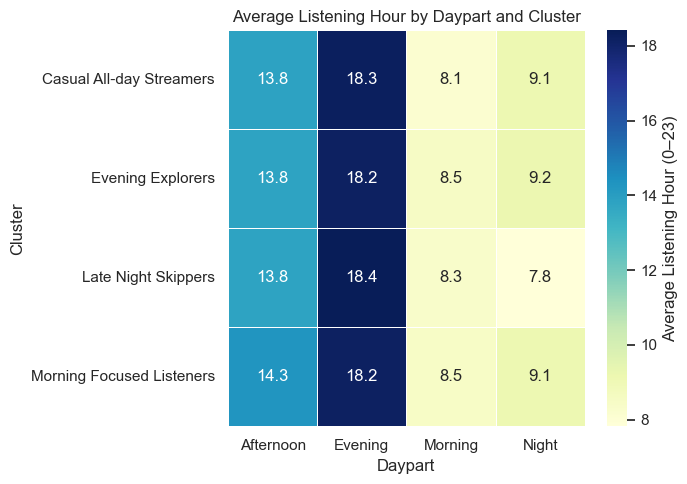

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Consistent cluster name mapping
cluster_map = {
    0: 'Late Night Skippers',
    1: 'Morning Focused Listeners',
    2: 'Casual All-day Streamers',
    3: 'Evening Explorers'
}

# Map cluster numbers to names
df['cluster_name'] = df['cluster'].map(cluster_map)

# Create pivot table
heatmap_data = df.pivot_table(
    index='cluster_name',
    columns='daypart',
    values='hour',
    aggfunc='mean'
)

# Keep the same order as previous plot
desired_order = [
    'Casual All-day Streamers',
    'Evening Explorers',
    'Late Night Skippers',
    'Morning Focused Listeners'
]
heatmap_data = heatmap_data.loc[desired_order]

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    linewidths=0.5,
    annot=True,
    fmt=".1f",
    cbar_kws={'label': 'Average Listening Hour (0–23)'}
)
plt.title('Average Listening Hour by Daypart and Cluster')
plt.xlabel('Daypart')
plt.ylabel('Cluster')
plt.savefig("heatmap_listening_pattern.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()





Total listening minutes per cluster:
cluster_name
Casual All-day Streamers      8041.5
Evening Explorers            27334.0
Late Night Skippers          11643.2
Morning Focused Listeners    25700.0
Name: minutes_played, dtype: float64


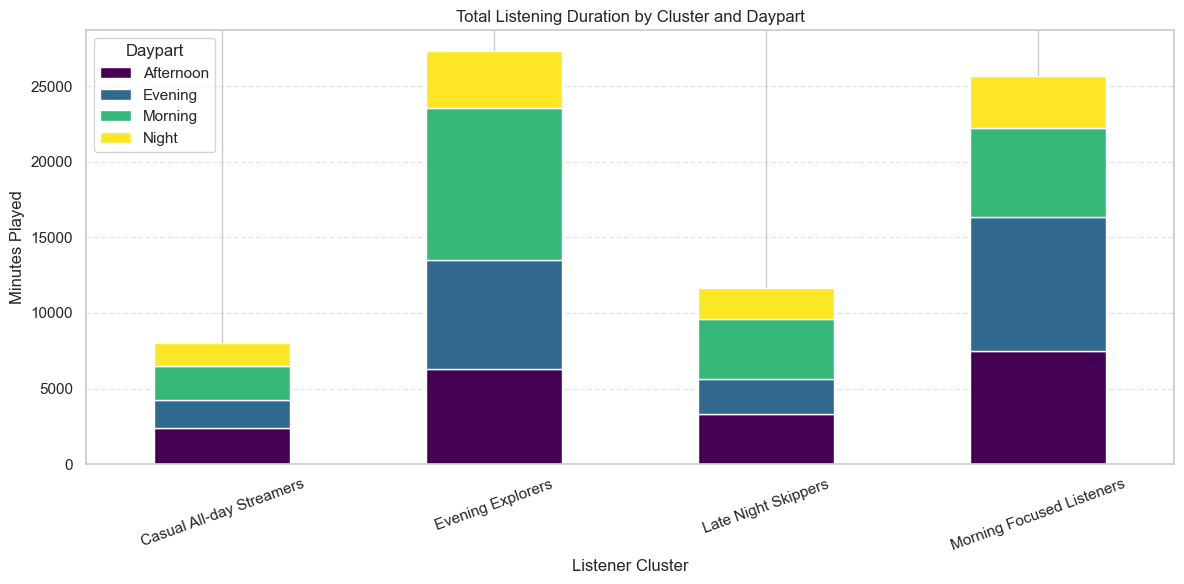

In [185]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\rahul\Rahulpython\clustered_spotify_data.csv")

# Step 1: Convert ms_played to minutes (before any grouping)
df['minutes_played'] = df['ms_played'] / (1000 * 60)

# Step 2: Map cluster numbers to meaningful names
cluster_names = {
    0: 'Late Night Skippers',
    1: 'Morning Focused Listeners',
    2: 'Casual All-day Streamers',
    3: 'Evening Explorers'
}
df['cluster_name'] = df['cluster'].map(cluster_names)

# Step 3: Group by cluster name and daypart to get total minutes
grouped = df.groupby(['cluster_name', 'daypart'])['minutes_played'].sum().reset_index()

# Step 4: Round to 1 decimal for neatness
grouped['minutes_played'] = grouped['minutes_played'].round(1)

# Optional: Print total minutes per cluster to verify
totals = df.groupby('cluster_name')['minutes_played'].sum().round(1)
print("\nTotal listening minutes per cluster:")
print(totals)

# Step 5: Pivot for stacked bar plotting
pivot = grouped.pivot(index='cluster_name', columns='daypart', values='minutes_played').fillna(0)

# Step 6: Plot
pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Total Listening Duration by Cluster and Daypart')
plt.ylabel('Minutes Played')
plt.xlabel('Listener Cluster')
plt.legend(title='Daypart')
plt.xticks(rotation=20)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [181]:
# Manually verify total minutes in cluster 1
print(df[df['cluster_name'] == 'Morning Focused Listeners']['minutes_played'].sum())

25699.996716666665


In [182]:
print("Cluster 0 - Late Night Skippers:",
      df[df['cluster_name'] == 'Late Night Skippers']['minutes_played'].sum())

Cluster 0 - Late Night Skippers: 11643.191550000001


In [183]:
print("Cluster 2 - Casual All-day Streamers:",
      df[df['cluster_name'] == 'Casual All-day Streamers']['minutes_played'].sum())

Cluster 2 - Casual All-day Streamers: 8041.527


In [184]:
print("Cluster 3 - Evening Explorers:",
      df[df['cluster_name'] == 'Evening Explorers']['minutes_played'].sum())

Cluster 3 - Evening Explorers: 27334.049666666666


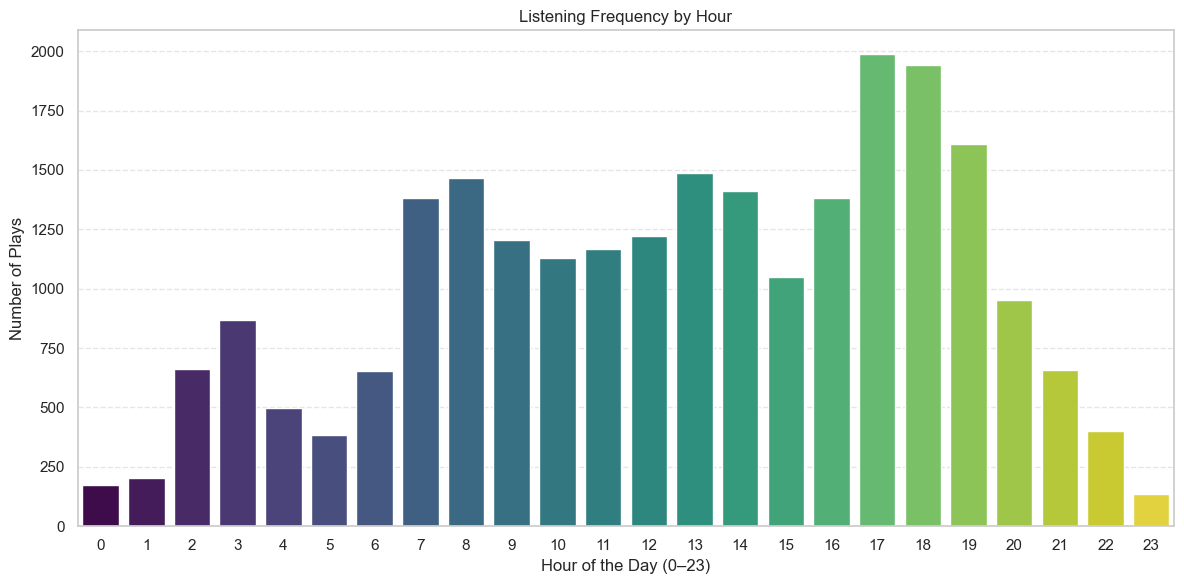

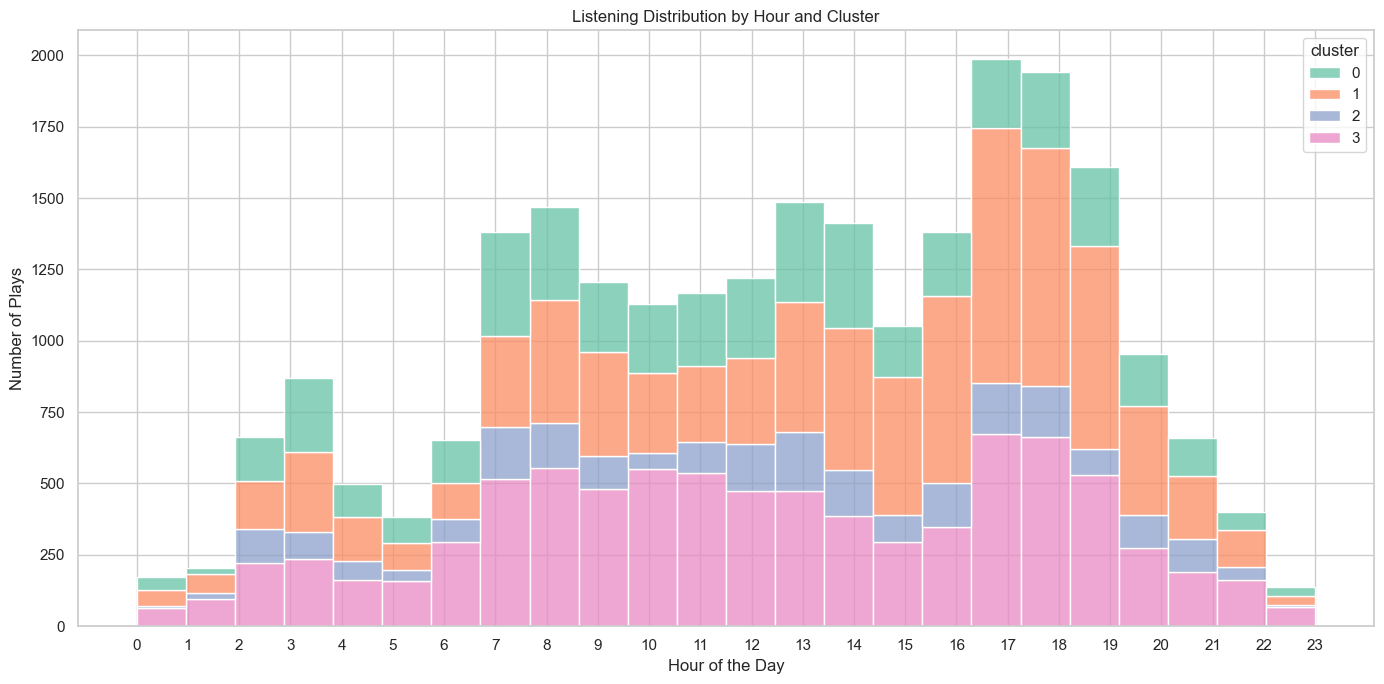

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
# Using the user-provided clustered_spotify_data.csv for this task
df = pd.read_csv("clustered_spotify_data.csv")

# Optional: Ensure 'hour' column is integer type and handle potential NaNs
df['hour'] = pd.to_numeric(df['hour'], errors='coerce')

# Drop NaNs if any were introduced
df = df.dropna(subset=['hour'])

# Convert to int if needed
df['hour'] = df['hour'].astype(int)

# Set seaborn style for better aesthetics
sns.set(style='whitegrid')

# Basic Listening Frequency Plot by Hour
plt.figure(figsize=(12, 6))
# FIX: Assign 'hour' to 'hue' and set 'legend=False' to address the FutureWarning
sns.countplot(data=df, x='hour', hue='hour', palette='viridis', legend=False, order=sorted(df['hour'].unique()))

plt.title('Listening Frequency by Hour')
plt.xlabel('Hour of the Day (0–23)')
plt.ylabel('Number of Plays')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Optional: Listening Frequency by Cluster (if 'cluster' column exists)
if 'cluster' in df.columns:
    plt.figure(figsize=(14, 7))
    sns.histplot(data=df, x='hour', hue='cluster', multiple='stack', bins=24, palette='Set2')

    plt.title('Listening Distribution by Hour and Cluster')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Plays')
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.show()
